# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 18226 substitutions for model Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.all)


  0% (    1 of 18226) |                   | Elapsed Time: 0:00:04 ETA:  21:02:11

  0% (  108 of 18226) |                    | Elapsed Time: 0:00:05 ETA:  0:02:51

  1% (  204 of 18226) |                    | Elapsed Time: 0:00:06 ETA:  0:02:57

  1% (  228 of 18226) |                    | Elapsed Time: 0:00:06 ETA:  0:03:01

  1% (  324 of 18226) |                    | Elapsed Time: 0:00:07 ETA:  0:03:01

  2% (  432 of 18226) |                    | Elapsed Time: 0:00:08 ETA:  0:02:55

  2% (  456 of 18226) |                    | Elapsed Time: 0:00:08 ETA:  0:02:54

  3% (  567 of 18226) |                    | Elapsed Time: 0:00:09 ETA:  0:02:49

  3% (  684 of 18226) |                    | Elapsed Time: 0:00:10 ETA:  0:02:46

  4% (  783 of 18226) |                    | Elapsed Time: 0:00:11 ETA:  0:02:46

  5% (  912 of 18226) |#                   | Elapsed Time: 0:00:13 ETA:  0:02:40

  5% ( 1018 of 18226) |#                   | Elapsed Time: 0:00:14 ETA:  0:02:36

  6% ( 1140 of 18226) |#                   | Elapsed Time: 0:00:15 ETA:  0:02:35

  6% ( 1222 of 18226) |#                   | Elapsed Time: 0:00:16 ETA:  0:02:44

  7% ( 1341 of 18226) |#                   | Elapsed Time: 0:00:17 ETA:  0:02:41

  7% ( 1367 of 18226) |#                   | Elapsed Time: 0:00:17 ETA:  0:02:40

  8% ( 1471 of 18226) |#                   | Elapsed Time: 0:00:18 ETA:  0:02:38

  8% ( 1595 of 18226) |#                   | Elapsed Time: 0:00:19 ETA:  0:02:36

  9% ( 1687 of 18226) |#                   | Elapsed Time: 0:00:20 ETA:  0:02:39

  9% ( 1784 of 18226) |#                   | Elapsed Time: 0:00:21 ETA:  0:02:41

 10% ( 1823 of 18226) |##                  | Elapsed Time: 0:00:22 ETA:  0:02:42

 10% ( 1922 of 18226) |##                  | Elapsed Time: 0:00:23 ETA:  0:02:34

 11% ( 2051 of 18226) |##                  | Elapsed Time: 0:00:24 ETA:  0:02:34

 11% ( 2158 of 18226) |##                  | Elapsed Time: 0:00:25 ETA:  0:02:32

 12% ( 2258 of 18226) |##                  | Elapsed Time: 0:00:26 ETA:  0:02:34

 12% ( 2279 of 18226) |##                  | Elapsed Time: 0:00:26 ETA:  0:02:34

 13% ( 2385 of 18226) |##                  | Elapsed Time: 0:00:27 ETA:  0:02:29

 13% ( 2507 of 18226) |##                  | Elapsed Time: 0:00:28 ETA:  0:02:22

 14% ( 2612 of 18226) |##                  | Elapsed Time: 0:00:29 ETA:  0:02:19

 14% ( 2709 of 18226) |##                  | Elapsed Time: 0:00:30 ETA:  0:02:22

 15% ( 2734 of 18226) |###                 | Elapsed Time: 0:00:30 ETA:  0:02:22

 15% ( 2839 of 18226) |###                 | Elapsed Time: 0:00:31 ETA:  0:02:29

 16% ( 2940 of 18226) |###                 | Elapsed Time: 0:00:32 ETA:  0:02:28

 16% ( 2962 of 18226) |###                 | Elapsed Time: 0:00:33 ETA:  0:02:28

 16% ( 3063 of 18226) |###                 | Elapsed Time: 0:00:34 ETA:  0:02:28

 17% ( 3141 of 18226) |###                 | Elapsed Time: 0:00:35 ETA:  0:02:38

 17% ( 3190 of 18226) |###                 | Elapsed Time: 0:00:35 ETA:  0:02:38

 17% ( 3270 of 18226) |###                 | Elapsed Time: 0:00:36 ETA:  0:02:44

 18% ( 3366 of 18226) |###                 | Elapsed Time: 0:00:37 ETA:  0:02:44

 18% ( 3418 of 18226) |###                 | Elapsed Time: 0:00:38 ETA:  0:02:41

 19% ( 3544 of 18226) |###                 | Elapsed Time: 0:00:39 ETA:  0:02:26

 20% ( 3646 of 18226) |####                | Elapsed Time: 0:00:40 ETA:  0:02:22

 20% ( 3758 of 18226) |####                | Elapsed Time: 0:00:41 ETA:  0:02:18

 21% ( 3874 of 18226) |####                | Elapsed Time: 0:00:42 ETA:  0:02:14

 21% ( 3968 of 18226) |####                | Elapsed Time: 0:00:43 ETA:  0:02:10

 22% ( 4067 of 18226) |####                | Elapsed Time: 0:00:44 ETA:  0:02:09

 22% ( 4101 of 18226) |####                | Elapsed Time: 0:00:44 ETA:  0:02:02

 23% ( 4205 of 18226) |####                | Elapsed Time: 0:00:45 ETA:  0:02:00

 23% ( 4329 of 18226) |####                | Elapsed Time: 0:00:46 ETA:  0:02:02

 24% ( 4423 of 18226) |####                | Elapsed Time: 0:00:47 ETA:  0:02:05

 24% ( 4524 of 18226) |####                | Elapsed Time: 0:00:48 ETA:  0:02:06

 25% ( 4557 of 18226) |#####               | Elapsed Time: 0:00:48 ETA:  0:02:08

 25% ( 4665 of 18226) |#####               | Elapsed Time: 0:00:49 ETA:  0:02:03

 26% ( 4785 of 18226) |#####               | Elapsed Time: 0:00:50 ETA:  0:02:01

 26% ( 4901 of 18226) |#####               | Elapsed Time: 0:00:51 ETA:  0:01:57

 27% ( 5013 of 18226) |#####               | Elapsed Time: 0:00:52 ETA:  0:01:56

 28% ( 5118 of 18226) |#####               | Elapsed Time: 0:00:53 ETA:  0:01:56

 28% ( 5184 of 18226) |#####               | Elapsed Time: 0:00:54 ETA:  0:02:02

 28% ( 5240 of 18226) |#####               | Elapsed Time: 0:00:55 ETA:  0:01:59

 29% ( 5351 of 18226) |#####               | Elapsed Time: 0:00:56 ETA:  0:01:58

 30% ( 5468 of 18226) |######              | Elapsed Time: 0:00:57 ETA:  0:01:58

 30% ( 5585 of 18226) |######              | Elapsed Time: 0:00:58 ETA:  0:01:54

 31% ( 5696 of 18226) |######              | Elapsed Time: 0:00:59 ETA:  0:01:54

 31% ( 5806 of 18226) |######              | Elapsed Time: 0:01:00 ETA:  0:01:54

 32% ( 5924 of 18226) |######              | Elapsed Time: 0:01:01 ETA:  0:01:42

 33% ( 6028 of 18226) |######              | Elapsed Time: 0:01:02 ETA:  0:01:43

 33% ( 6152 of 18226) |######              | Elapsed Time: 0:01:03 ETA:  0:01:40

 34% ( 6272 of 18226) |######              | Elapsed Time: 0:01:04 ETA:  0:01:37

 35% ( 6380 of 18226) |#######             | Elapsed Time: 0:01:05 ETA:  0:01:38

 35% ( 6496 of 18226) |#######             | Elapsed Time: 0:01:06 ETA:  0:01:36

 36% ( 6607 of 18226) |#######             | Elapsed Time: 0:01:07 ETA:  0:01:32

 36% ( 6732 of 18226) |#######             | Elapsed Time: 0:01:08 ETA:  0:01:28

 37% ( 6835 of 18226) |#######             | Elapsed Time: 0:01:09 ETA:  0:01:26

 38% ( 6943 of 18226) |#######             | Elapsed Time: 0:01:10 ETA:  0:01:25

 38% ( 7063 of 18226) |#######             | Elapsed Time: 0:01:11 ETA:  0:01:24

 39% ( 7163 of 18226) |#######             | Elapsed Time: 0:01:12 ETA:  0:01:27

 40% ( 7291 of 18226) |########            | Elapsed Time: 0:01:13 ETA:  0:01:25

 40% ( 7403 of 18226) |########            | Elapsed Time: 0:01:14 ETA:  0:01:27

 41% ( 7519 of 18226) |########            | Elapsed Time: 0:01:15 ETA:  0:01:27

 41% ( 7634 of 18226) |########            | Elapsed Time: 0:01:16 ETA:  0:01:27

 42% ( 7747 of 18226) |########            | Elapsed Time: 0:01:17 ETA:  0:01:23

 43% ( 7859 of 18226) |########            | Elapsed Time: 0:01:18 ETA:  0:01:23

 43% ( 7974 of 18226) |########            | Elapsed Time: 0:01:19 ETA:  0:01:21

 44% ( 8074 of 18226) |########            | Elapsed Time: 0:01:20 ETA:  0:01:20

 45% ( 8202 of 18226) |#########           | Elapsed Time: 0:01:21 ETA:  0:01:19

 45% ( 8255 of 18226) |#########           | Elapsed Time: 0:01:22 ETA:  0:01:29

 45% ( 8360 of 18226) |#########           | Elapsed Time: 0:01:23 ETA:  0:01:31

 46% ( 8430 of 18226) |#########           | Elapsed Time: 0:01:24 ETA:  0:01:32

 46% ( 8538 of 18226) |#########           | Elapsed Time: 0:01:25 ETA:  0:01:34

 47% ( 8658 of 18226) |#########           | Elapsed Time: 0:01:26 ETA:  0:01:36

 48% ( 8776 of 18226) |#########           | Elapsed Time: 0:01:27 ETA:  0:01:30

 48% ( 8886 of 18226) |#########           | Elapsed Time: 0:01:28 ETA:  0:01:28

 49% ( 9006 of 18226) |#########           | Elapsed Time: 0:01:29 ETA:  0:01:24

 50% ( 9113 of 18226) |##########          | Elapsed Time: 0:01:30 ETA:  0:01:10

 50% ( 9219 of 18226) |##########          | Elapsed Time: 0:01:31 ETA:  0:01:09

 51% ( 9341 of 18226) |##########          | Elapsed Time: 0:01:32 ETA:  0:01:06

 51% ( 9447 of 18226) |##########          | Elapsed Time: 0:01:33 ETA:  0:01:07

 52% ( 9569 of 18226) |##########          | Elapsed Time: 0:01:34 ETA:  0:01:07

 53% ( 9686 of 18226) |##########          | Elapsed Time: 0:01:35 ETA:  0:01:06

 53% ( 9797 of 18226) |##########          | Elapsed Time: 0:01:36 ETA:  0:01:07

 54% ( 9899 of 18226) |##########          | Elapsed Time: 0:01:37 ETA:  0:01:10

 55% (10025 of 18226) |###########         | Elapsed Time: 0:01:38 ETA:  0:01:08

 55% (10142 of 18226) |###########         | Elapsed Time: 0:01:39 ETA:  0:01:06

 56% (10253 of 18226) |###########         | Elapsed Time: 0:01:40 ETA:  0:01:03

 56% (10368 of 18226) |###########         | Elapsed Time: 0:01:41 ETA:  0:01:01

 57% (10480 of 18226) |###########         | Elapsed Time: 0:01:42 ETA:  0:01:00

 58% (10589 of 18226) |###########         | Elapsed Time: 0:01:43 ETA:  0:01:00

 58% (10708 of 18226) |###########         | Elapsed Time: 0:01:44 ETA:  0:00:59

 59% (10828 of 18226) |###########         | Elapsed Time: 0:01:45 ETA:  0:00:55

 60% (10936 of 18226) |############        | Elapsed Time: 0:01:46 ETA:  0:00:58

 60% (11046 of 18226) |############        | Elapsed Time: 0:01:47 ETA:  0:00:59

 61% (11164 of 18226) |############        | Elapsed Time: 0:01:48 ETA:  0:01:00

 61% (11272 of 18226) |############        | Elapsed Time: 0:01:49 ETA:  0:00:59

 62% (11392 of 18226) |############        | Elapsed Time: 0:01:50 ETA:  0:00:57

 63% (11504 of 18226) |############        | Elapsed Time: 0:01:51 ETA:  0:00:58

 63% (11620 of 18226) |############        | Elapsed Time: 0:01:52 ETA:  0:00:53

 64% (11727 of 18226) |############        | Elapsed Time: 0:01:53 ETA:  0:00:53

 65% (11847 of 18226) |#############       | Elapsed Time: 0:01:55 ETA:  0:00:52

 65% (11961 of 18226) |#############       | Elapsed Time: 0:01:56 ETA:  0:00:50

 66% (12049 of 18226) |#############       | Elapsed Time: 0:01:57 ETA:  0:01:06

 66% (12075 of 18226) |#############       | Elapsed Time: 0:01:57 ETA:  0:01:06

 66% (12183 of 18226) |#############       | Elapsed Time: 0:01:58 ETA:  0:01:06

 67% (12303 of 18226) |#############       | Elapsed Time: 0:01:59 ETA:  0:01:05

 68% (12416 of 18226) |#############       | Elapsed Time: 0:02:00 ETA:  0:01:03

 68% (12531 of 18226) |#############       | Elapsed Time: 0:02:02 ETA:  0:01:03

 69% (12637 of 18226) |#############       | Elapsed Time: 0:02:03 ETA:  0:01:04

 70% (12759 of 18226) |##############      | Elapsed Time: 0:02:04 ETA:  0:00:43

 70% (12843 of 18226) |##############      | Elapsed Time: 0:02:05 ETA:  0:00:48

 71% (12955 of 18226) |##############      | Elapsed Time: 0:02:06 ETA:  0:00:46

 71% (12987 of 18226) |##############      | Elapsed Time: 0:02:06 ETA:  0:00:45

 71% (13095 of 18226) |##############      | Elapsed Time: 0:02:07 ETA:  0:00:45

 72% (13214 of 18226) |##############      | Elapsed Time: 0:02:08 ETA:  0:00:40

 73% (13336 of 18226) |##############      | Elapsed Time: 0:02:09 ETA:  0:00:35

 73% (13442 of 18226) |##############      | Elapsed Time: 0:02:10 ETA:  0:00:36

 74% (13560 of 18226) |##############      | Elapsed Time: 0:02:11 ETA:  0:00:33

 75% (13670 of 18226) |###############     | Elapsed Time: 0:02:12 ETA:  0:00:26

 75% (13785 of 18226) |###############     | Elapsed Time: 0:02:13 ETA:  0:00:24

 76% (13898 of 18226) |###############     | Elapsed Time: 0:02:14 ETA:  0:00:23

 76% (14009 of 18226) |###############     | Elapsed Time: 0:02:15 ETA:  0:00:23

 77% (14126 of 18226) |###############     | Elapsed Time: 0:02:16 ETA:  0:00:25

 78% (14243 of 18226) |###############     | Elapsed Time: 0:02:17 ETA:  0:00:23

 78% (14353 of 18226) |###############     | Elapsed Time: 0:02:18 ETA:  0:00:26

 79% (14465 of 18226) |###############     | Elapsed Time: 0:02:19 ETA:  0:00:25

 80% (14581 of 18226) |################    | Elapsed Time: 0:02:20 ETA:  0:00:22

 80% (14691 of 18226) |################    | Elapsed Time: 0:02:21 ETA:  0:00:21

 81% (14809 of 18226) |################    | Elapsed Time: 0:02:22 ETA:  0:00:18

 81% (14920 of 18226) |################    | Elapsed Time: 0:02:23 ETA:  0:00:18

 82% (15037 of 18226) |################    | Elapsed Time: 0:02:24 ETA:  0:00:16

 83% (15150 of 18226) |################    | Elapsed Time: 0:02:25 ETA:  0:00:15

 83% (15265 of 18226) |################    | Elapsed Time: 0:02:26 ETA:  0:00:16

 84% (15382 of 18226) |################    | Elapsed Time: 0:02:27 ETA:  0:00:13

 85% (15493 of 18226) |#################   | Elapsed Time: 0:02:28 ETA:  0:00:11

 85% (15608 of 18226) |#################   | Elapsed Time: 0:02:29 ETA:  0:00:10

 86% (15720 of 18226) |#################   | Elapsed Time: 0:02:30 ETA:  0:00:07

 86% (15834 of 18226) |#################   | Elapsed Time: 0:02:31 ETA:  0:00:06

 87% (15948 of 18226) |#################   | Elapsed Time: 0:02:32 ETA:  0:00:05

 88% (16064 of 18226) |#################   | Elapsed Time: 0:02:33 ETA:  0:00:04

 88% (16176 of 18226) |#################   | Elapsed Time: 0:02:34 ETA:  0:00:01

 89% (16262 of 18226) |#################   | Elapsed Time: 0:02:35 ETA:  0:00:05

 89% (16370 of 18226) |#################   | Elapsed Time: 0:02:36 ETA:  0:00:06

 90% (16404 of 18226) |##################  | Elapsed Time: 0:02:36 ETA:  0:00:07

 90% (16523 of 18226) |##################  | Elapsed Time: 0:02:37 ETA:  0:00:05

 91% (16597 of 18226) |##################  | Elapsed Time: 0:02:39 ETA:  0:00:21

 91% (16632 of 18226) |##################  | Elapsed Time: 0:02:39 ETA:  0:00:24

 91% (16737 of 18226) |##################  | Elapsed Time: 0:02:40 ETA:  0:00:25

 92% (16860 of 18226) |##################  | Elapsed Time: 0:02:41 ETA:  0:00:32

 93% (16963 of 18226) |##################  | Elapsed Time: 0:02:42 ETA:  0:00:26

 93% (17068 of 18226) |##################  | Elapsed Time: 0:02:43 ETA:  0:00:26

 93% (17087 of 18226) |##################  | Elapsed Time: 0:02:43 ETA:  0:00:29

 94% (17200 of 18226) |##################  | Elapsed Time: 0:02:44 ETA:  0:00:29

 95% (17315 of 18226) |################### | Elapsed Time: 0:02:45 ETA:  0:00:07

 95% (17427 of 18226) |################### | Elapsed Time: 0:02:46 ETA:  0:00:05

 96% (17543 of 18226) |################### | Elapsed Time: 0:02:47 ETA:  0:00:01

 96% (17660 of 18226) |################### | Elapsed Time: 0:02:48 ETA:  0:00:00

 97% (17771 of 18226) |################### | Elapsed Time: 0:02:50 ETA:  0:00:00

 98% (17893 of 18226) |################### | Elapsed Time: 0:02:51 ETA:  0:00:00

 98% (17999 of 18226) |################### | Elapsed Time: 0:02:51 ETA:  0:00:00

 99% (18099 of 18226) |################### | Elapsed Time: 0:02:52 ETA:  0:00:00

 99% (18202 of 18226) |################### | Elapsed Time: 0:02:53 ETA:  0:00:00

100% (18226 of 18226) |####################| Elapsed Time: 0:02:54 Time: 0:02:54


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

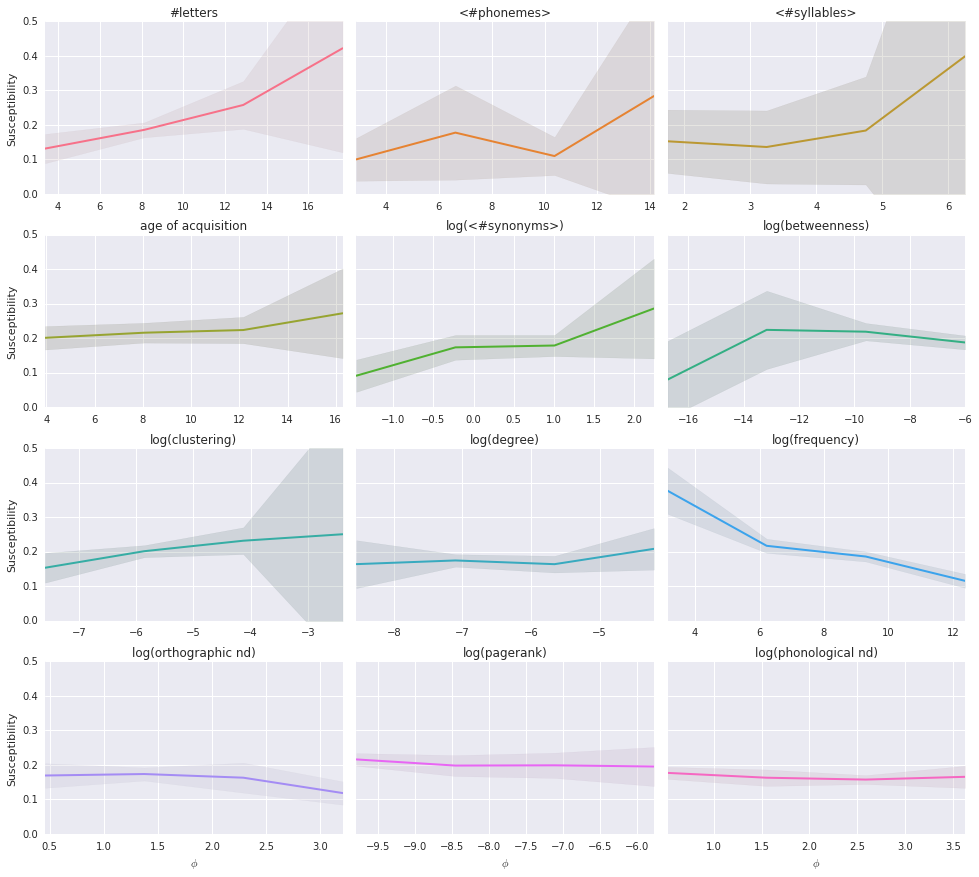

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

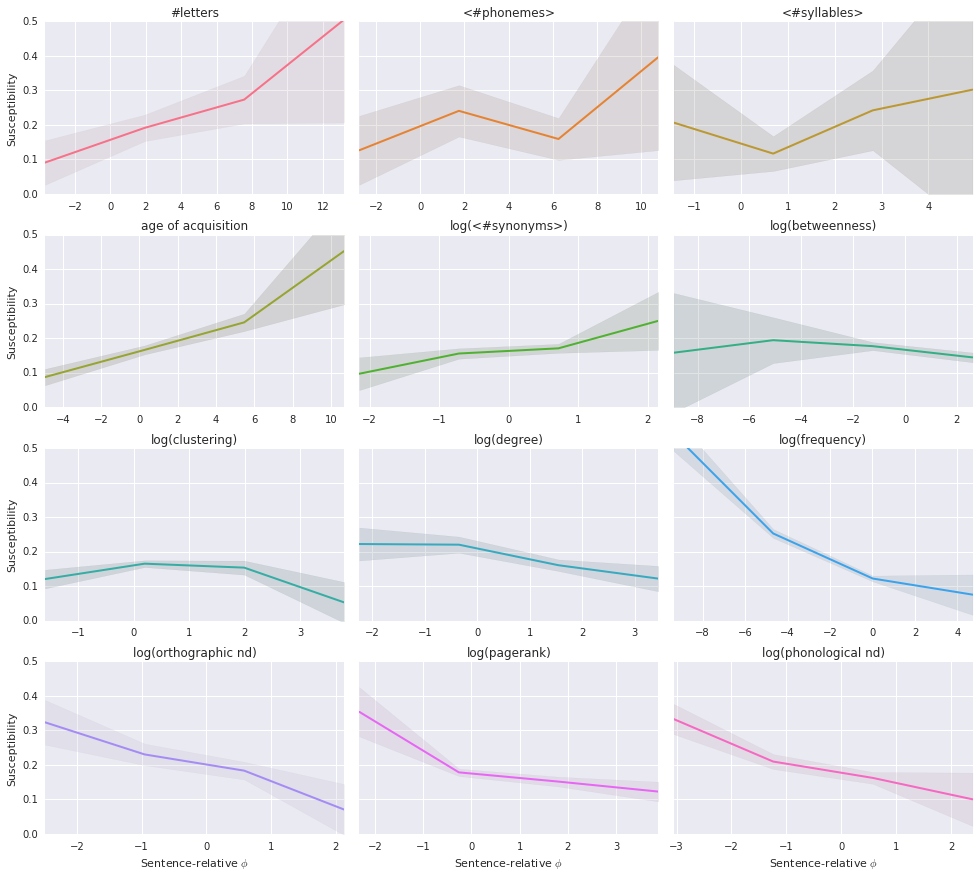

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

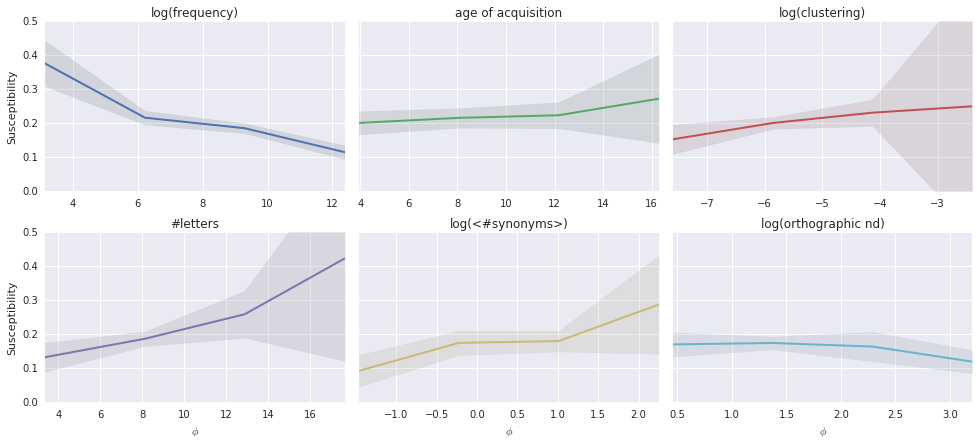

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

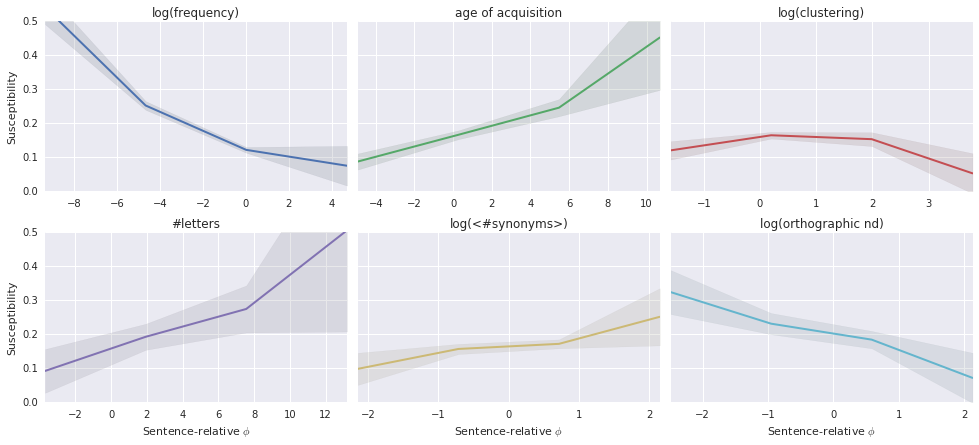

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

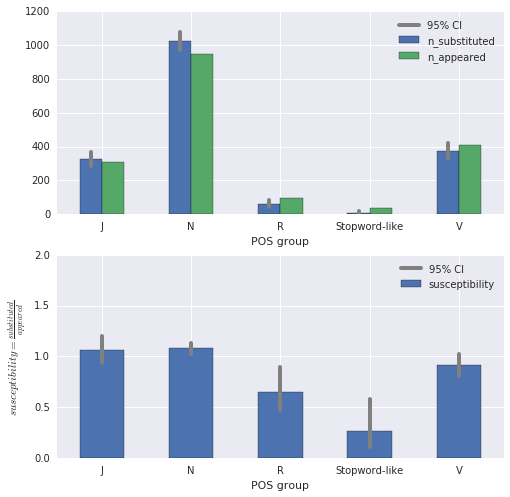

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['N', 'R', 'Stopword-like']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

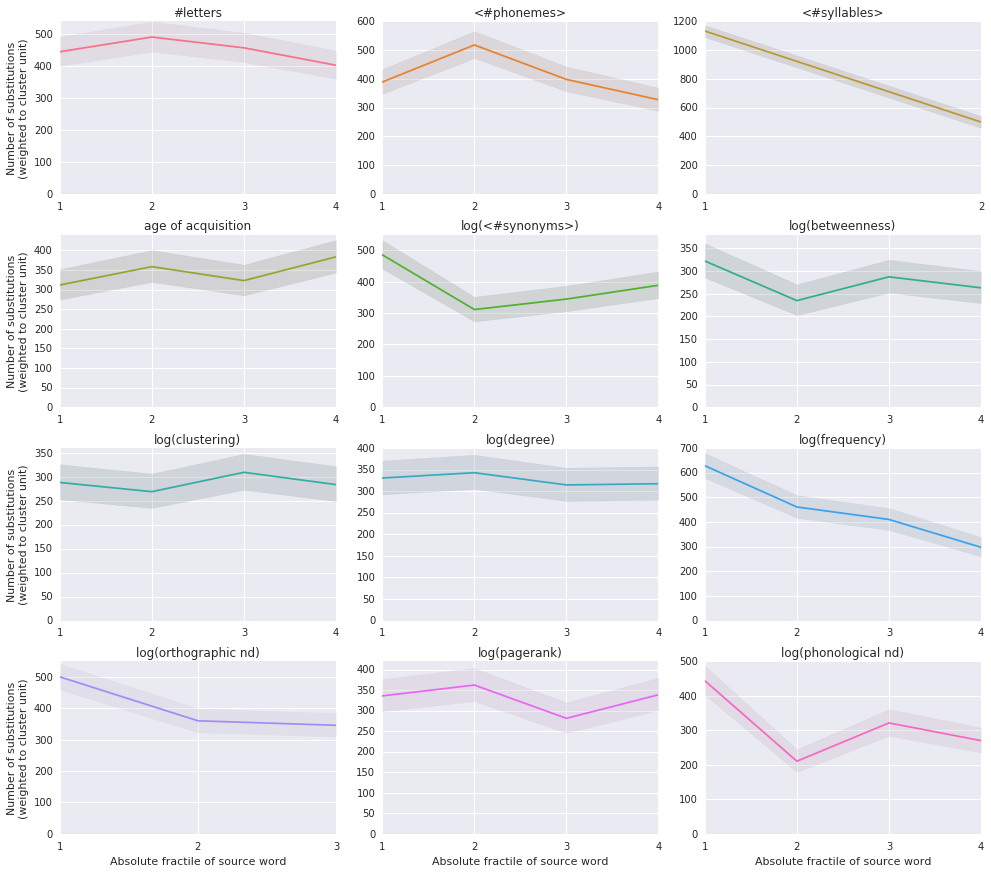

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

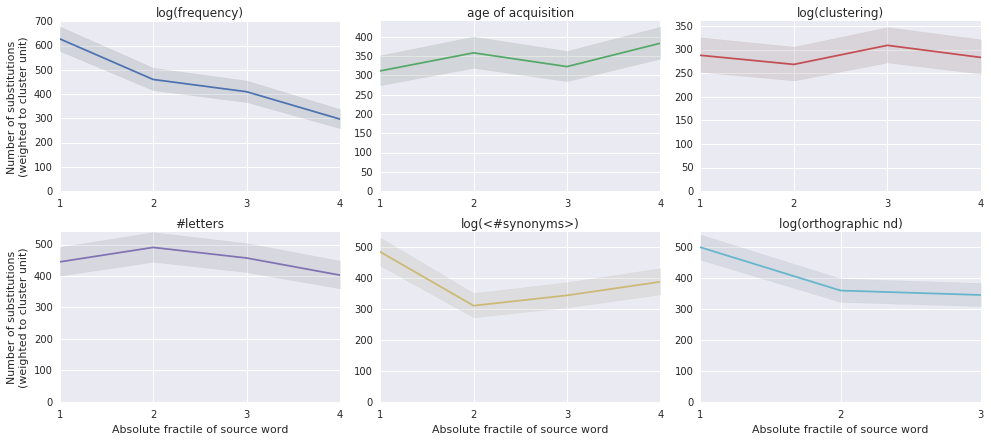

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (   94 of 18226) |                    | Elapsed Time: 0:00:01 ETA:  0:03:12

  1% (  204 of 18226) |                    | Elapsed Time: 0:00:02 ETA:  0:02:45

  1% (  228 of 18226) |                    | Elapsed Time: 0:00:02 ETA:  0:02:47

  1% (  322 of 18226) |                    | Elapsed Time: 0:00:03 ETA:  0:02:56

  2% (  427 of 18226) |                    | Elapsed Time: 0:00:04 ETA:  0:02:54

  2% (  456 of 18226) |                    | Elapsed Time: 0:00:04 ETA:  0:02:53

  3% (  557 of 18226) |                    | Elapsed Time: 0:00:05 ETA:  0:02:52

  3% (  684 of 18226) |                    | Elapsed Time: 0:00:06 ETA:  0:02:49

  4% (  773 of 18226) |                    | Elapsed Time: 0:00:07 ETA:  0:02:52

  4% (  850 of 18226) |                    | Elapsed Time: 0:00:08 ETA:  0:03:00

  5% (  912 of 18226) |#                   | Elapsed Time: 0:00:09 ETA:  0:03:03

  5% ( 1007 of 18226) |#                   | Elapsed Time: 0:00:10 ETA:  0:03:01

  6% ( 1099 of 18226) |#                   | Elapsed Time: 0:00:11 ETA:  0:03:04

  6% ( 1140 of 18226) |#                   | Elapsed Time: 0:00:11 ETA:  0:03:02

  6% ( 1248 of 18226) |#                   | Elapsed Time: 0:00:12 ETA:  0:02:59

  7% ( 1367 of 18226) |#                   | Elapsed Time: 0:00:13 ETA:  0:02:57

  7% ( 1457 of 18226) |#                   | Elapsed Time: 0:00:14 ETA:  0:02:56

  8% ( 1559 of 18226) |#                   | Elapsed Time: 0:00:15 ETA:  0:02:48

  8% ( 1595 of 18226) |#                   | Elapsed Time: 0:00:16 ETA:  0:02:48

  9% ( 1676 of 18226) |#                   | Elapsed Time: 0:00:17 ETA:  0:02:50

  9% ( 1776 of 18226) |#                   | Elapsed Time: 0:00:18 ETA:  0:02:47

 10% ( 1823 of 18226) |##                  | Elapsed Time: 0:00:18 ETA:  0:02:49

 10% ( 1917 of 18226) |##                  | Elapsed Time: 0:00:19 ETA:  0:02:52

 11% ( 2010 of 18226) |##                  | Elapsed Time: 0:00:20 ETA:  0:02:57

 11% ( 2051 of 18226) |##                  | Elapsed Time: 0:00:21 ETA:  0:02:57

 11% ( 2155 of 18226) |##                  | Elapsed Time: 0:00:22 ETA:  0:02:52

 12% ( 2249 of 18226) |##                  | Elapsed Time: 0:00:23 ETA:  0:02:53

 12% ( 2279 of 18226) |##                  | Elapsed Time: 0:00:23 ETA:  0:02:51

 13% ( 2375 of 18226) |##                  | Elapsed Time: 0:00:24 ETA:  0:02:45

 13% ( 2474 of 18226) |##                  | Elapsed Time: 0:00:25 ETA:  0:02:45

 13% ( 2507 of 18226) |##                  | Elapsed Time: 0:00:25 ETA:  0:02:42

 14% ( 2592 of 18226) |##                  | Elapsed Time: 0:00:26 ETA:  0:02:44

 14% ( 2694 of 18226) |##                  | Elapsed Time: 0:00:27 ETA:  0:02:40

 15% ( 2734 of 18226) |###                 | Elapsed Time: 0:00:28 ETA:  0:02:41

 15% ( 2831 of 18226) |###                 | Elapsed Time: 0:00:29 ETA:  0:02:42

 15% ( 2916 of 18226) |###                 | Elapsed Time: 0:00:30 ETA:  0:02:44

 16% ( 2962 of 18226) |###                 | Elapsed Time: 0:00:31 ETA:  0:02:44

 16% ( 3052 of 18226) |###                 | Elapsed Time: 0:00:32 ETA:  0:02:45

 17% ( 3127 of 18226) |###                 | Elapsed Time: 0:00:33 ETA:  0:02:51

 17% ( 3190 of 18226) |###                 | Elapsed Time: 0:00:33 ETA:  0:02:55

 18% ( 3282 of 18226) |###                 | Elapsed Time: 0:00:34 ETA:  0:02:52

 18% ( 3366 of 18226) |###                 | Elapsed Time: 0:00:35 ETA:  0:02:56

 18% ( 3418 of 18226) |###                 | Elapsed Time: 0:00:36 ETA:  0:02:55

 19% ( 3503 of 18226) |###                 | Elapsed Time: 0:00:37 ETA:  0:02:58

 19% ( 3603 of 18226) |###                 | Elapsed Time: 0:00:38 ETA:  0:02:52

 20% ( 3646 of 18226) |####                | Elapsed Time: 0:00:38 ETA:  0:02:48

 20% ( 3771 of 18226) |####                | Elapsed Time: 0:00:39 ETA:  0:02:36

 21% ( 3874 of 18226) |####                | Elapsed Time: 0:00:40 ETA:  0:02:28

 21% ( 3988 of 18226) |####                | Elapsed Time: 0:00:41 ETA:  0:02:20

 22% ( 4101 of 18226) |####                | Elapsed Time: 0:00:42 ETA:  0:02:12

 22% ( 4190 of 18226) |####                | Elapsed Time: 0:00:43 ETA:  0:02:12

 23% ( 4302 of 18226) |####                | Elapsed Time: 0:00:44 ETA:  0:02:06

 23% ( 4329 of 18226) |####                | Elapsed Time: 0:00:45 ETA:  0:02:04

 24% ( 4453 of 18226) |####                | Elapsed Time: 0:00:46 ETA:  0:02:00

 25% ( 4557 of 18226) |#####               | Elapsed Time: 0:00:47 ETA:  0:02:01

 25% ( 4659 of 18226) |#####               | Elapsed Time: 0:00:48 ETA:  0:02:01

 26% ( 4753 of 18226) |#####               | Elapsed Time: 0:00:49 ETA:  0:02:04

 26% ( 4785 of 18226) |#####               | Elapsed Time: 0:00:49 ETA:  0:02:00

 26% ( 4890 of 18226) |#####               | Elapsed Time: 0:00:50 ETA:  0:02:01

 27% ( 4984 of 18226) |#####               | Elapsed Time: 0:00:51 ETA:  0:01:59

 27% ( 5013 of 18226) |#####               | Elapsed Time: 0:00:51 ETA:  0:02:00

 28% ( 5108 of 18226) |#####               | Elapsed Time: 0:00:52 ETA:  0:02:01

 28% ( 5215 of 18226) |#####               | Elapsed Time: 0:00:53 ETA:  0:02:04

 28% ( 5240 of 18226) |#####               | Elapsed Time: 0:00:53 ETA:  0:02:08

 29% ( 5338 of 18226) |#####               | Elapsed Time: 0:00:54 ETA:  0:02:08

 29% ( 5435 of 18226) |#####               | Elapsed Time: 0:00:55 ETA:  0:02:06

 30% ( 5468 of 18226) |######              | Elapsed Time: 0:00:56 ETA:  0:02:07

 30% ( 5565 of 18226) |######              | Elapsed Time: 0:00:57 ETA:  0:02:08

 30% ( 5576 of 18226) |######              | Elapsed Time: 0:00:58 ETA:  0:02:39

 31% ( 5675 of 18226) |######              | Elapsed Time: 0:00:59 ETA:  0:02:35

 31% ( 5696 of 18226) |######              | Elapsed Time: 0:00:59 ETA:  0:02:37

 31% ( 5799 of 18226) |######              | Elapsed Time: 0:01:00 ETA:  0:02:38

 32% ( 5886 of 18226) |######              | Elapsed Time: 0:01:01 ETA:  0:02:37

 32% ( 5924 of 18226) |######              | Elapsed Time: 0:01:02 ETA:  0:02:41

 33% ( 6038 of 18226) |######              | Elapsed Time: 0:01:03 ETA:  0:02:33

 33% ( 6152 of 18226) |######              | Elapsed Time: 0:01:04 ETA:  0:02:33

 34% ( 6259 of 18226) |######              | Elapsed Time: 0:01:05 ETA:  0:01:56

 34% ( 6358 of 18226) |######              | Elapsed Time: 0:01:06 ETA:  0:01:55

 35% ( 6380 of 18226) |#######             | Elapsed Time: 0:01:06 ETA:  0:01:57

 35% ( 6483 of 18226) |#######             | Elapsed Time: 0:01:07 ETA:  0:01:56

 36% ( 6584 of 18226) |#######             | Elapsed Time: 0:01:08 ETA:  0:01:51

 36% ( 6607 of 18226) |#######             | Elapsed Time: 0:01:08 ETA:  0:01:50

 36% ( 6700 of 18226) |#######             | Elapsed Time: 0:01:09 ETA:  0:01:54

 37% ( 6813 of 18226) |#######             | Elapsed Time: 0:01:10 ETA:  0:01:50

 37% ( 6835 of 18226) |#######             | Elapsed Time: 0:01:11 ETA:  0:01:49

 38% ( 6928 of 18226) |#######             | Elapsed Time: 0:01:12 ETA:  0:01:52

 38% ( 7021 of 18226) |#######             | Elapsed Time: 0:01:13 ETA:  0:01:53

 38% ( 7063 of 18226) |#######             | Elapsed Time: 0:01:13 ETA:  0:01:49

 39% ( 7163 of 18226) |#######             | Elapsed Time: 0:01:14 ETA:  0:01:49

 39% ( 7256 of 18226) |#######             | Elapsed Time: 0:01:15 ETA:  0:01:50

 40% ( 7291 of 18226) |########            | Elapsed Time: 0:01:15 ETA:  0:01:48

 40% ( 7415 of 18226) |########            | Elapsed Time: 0:01:16 ETA:  0:01:40

 41% ( 7519 of 18226) |########            | Elapsed Time: 0:01:17 ETA:  0:01:42

 41% ( 7611 of 18226) |########            | Elapsed Time: 0:01:18 ETA:  0:01:41

 42% ( 7747 of 18226) |########            | Elapsed Time: 0:01:19 ETA:  0:01:35

 43% ( 7853 of 18226) |########            | Elapsed Time: 0:01:20 ETA:  0:01:32

 43% ( 7949 of 18226) |########            | Elapsed Time: 0:01:21 ETA:  0:01:30

 43% ( 7974 of 18226) |########            | Elapsed Time: 0:01:22 ETA:  0:01:32

 44% ( 8075 of 18226) |########            | Elapsed Time: 0:01:23 ETA:  0:01:37

 45% ( 8202 of 18226) |#########           | Elapsed Time: 0:01:24 ETA:  0:01:33

 45% ( 8295 of 18226) |#########           | Elapsed Time: 0:01:25 ETA:  0:01:32

 46% ( 8406 of 18226) |#########           | Elapsed Time: 0:01:26 ETA:  0:01:32

 46% ( 8430 of 18226) |#########           | Elapsed Time: 0:01:26 ETA:  0:01:32

 46% ( 8520 of 18226) |#########           | Elapsed Time: 0:01:27 ETA:  0:01:35

 47% ( 8621 of 18226) |#########           | Elapsed Time: 0:01:28 ETA:  0:01:33

 47% ( 8658 of 18226) |#########           | Elapsed Time: 0:01:29 ETA:  0:01:32

 48% ( 8759 of 18226) |#########           | Elapsed Time: 0:01:30 ETA:  0:01:31

 48% ( 8886 of 18226) |#########           | Elapsed Time: 0:01:31 ETA:  0:01:27

 49% ( 8997 of 18226) |#########           | Elapsed Time: 0:01:32 ETA:  0:01:22

 50% ( 9113 of 18226) |##########          | Elapsed Time: 0:01:33 ETA:  0:01:18

 50% ( 9235 of 18226) |##########          | Elapsed Time: 0:01:34 ETA:  0:01:14

 51% ( 9341 of 18226) |##########          | Elapsed Time: 0:01:35 ETA:  0:01:09

 51% ( 9448 of 18226) |##########          | Elapsed Time: 0:01:36 ETA:  0:01:07

 52% ( 9569 of 18226) |##########          | Elapsed Time: 0:01:37 ETA:  0:01:01

 53% ( 9667 of 18226) |##########          | Elapsed Time: 0:01:38 ETA:  0:01:04

 53% ( 9766 of 18226) |##########          | Elapsed Time: 0:01:39 ETA:  0:01:06

 53% ( 9797 of 18226) |##########          | Elapsed Time: 0:01:39 ETA:  0:01:05

 54% ( 9910 of 18226) |##########          | Elapsed Time: 0:01:40 ETA:  0:01:06

 55% (10025 of 18226) |###########         | Elapsed Time: 0:01:41 ETA:  0:01:09

 55% (10119 of 18226) |###########         | Elapsed Time: 0:01:42 ETA:  0:01:11

 56% (10223 of 18226) |###########         | Elapsed Time: 0:01:43 ETA:  0:01:14

 56% (10253 of 18226) |###########         | Elapsed Time: 0:01:43 ETA:  0:01:14

 56% (10370 of 18226) |###########         | Elapsed Time: 0:01:44 ETA:  0:01:08

 57% (10480 of 18226) |###########         | Elapsed Time: 0:01:45 ETA:  0:01:03

 58% (10588 of 18226) |###########         | Elapsed Time: 0:01:46 ETA:  0:01:02

 58% (10708 of 18226) |###########         | Elapsed Time: 0:01:47 ETA:  0:01:03

 59% (10821 of 18226) |###########         | Elapsed Time: 0:01:48 ETA:  0:01:01

 60% (10936 of 18226) |############        | Elapsed Time: 0:01:49 ETA:  0:00:55

 60% (11044 of 18226) |############        | Elapsed Time: 0:01:50 ETA:  0:00:54

 61% (11164 of 18226) |############        | Elapsed Time: 0:01:51 ETA:  0:00:48

 62% (11311 of 18226) |############        | Elapsed Time: 0:01:52 ETA:  0:00:41

 62% (11392 of 18226) |############        | Elapsed Time: 0:01:53 ETA:  0:00:35

 63% (11495 of 18226) |############        | Elapsed Time: 0:01:54 ETA:  0:00:34

 63% (11620 of 18226) |############        | Elapsed Time: 0:01:55 ETA:  0:00:33

 64% (11730 of 18226) |############        | Elapsed Time: 0:01:56 ETA:  0:00:31

 65% (11847 of 18226) |#############       | Elapsed Time: 0:01:57 ETA:  0:00:31

 65% (11960 of 18226) |#############       | Elapsed Time: 0:01:58 ETA:  0:00:36

 66% (12075 of 18226) |#############       | Elapsed Time: 0:01:59 ETA:  0:00:47

 66% (12173 of 18226) |#############       | Elapsed Time: 0:02:00 ETA:  0:00:47

 67% (12303 of 18226) |#############       | Elapsed Time: 0:02:01 ETA:  0:00:46

 68% (12422 of 18226) |#############       | Elapsed Time: 0:02:02 ETA:  0:00:43

 68% (12531 of 18226) |#############       | Elapsed Time: 0:02:03 ETA:  0:00:42

 69% (12639 of 18226) |#############       | Elapsed Time: 0:02:04 ETA:  0:00:43

 69% (12745 of 18226) |#############       | Elapsed Time: 0:02:05 ETA:  0:00:44

 70% (12759 of 18226) |##############      | Elapsed Time: 0:02:06 ETA:  0:00:45

 70% (12849 of 18226) |##############      | Elapsed Time: 0:02:07 ETA:  0:00:46

 71% (12951 of 18226) |##############      | Elapsed Time: 0:02:08 ETA:  0:00:47

 71% (12987 of 18226) |##############      | Elapsed Time: 0:02:08 ETA:  0:00:47

 71% (13114 of 18226) |##############      | Elapsed Time: 0:02:09 ETA:  0:00:44

 72% (13214 of 18226) |##############      | Elapsed Time: 0:02:09 ETA:  0:00:32

 73% (13322 of 18226) |##############      | Elapsed Time: 0:02:10 ETA:  0:00:32

 73% (13442 of 18226) |##############      | Elapsed Time: 0:02:12 ETA:  0:00:32

 74% (13554 of 18226) |##############      | Elapsed Time: 0:02:13 ETA:  0:00:29

 75% (13670 of 18226) |###############     | Elapsed Time: 0:02:14 ETA:  0:00:22

 75% (13776 of 18226) |###############     | Elapsed Time: 0:02:15 ETA:  0:00:20

 76% (13898 of 18226) |###############     | Elapsed Time: 0:02:16 ETA:  0:00:21

 76% (14009 of 18226) |###############     | Elapsed Time: 0:02:17 ETA:  0:00:28

 77% (14098 of 18226) |###############     | Elapsed Time: 0:02:19 ETA:  0:00:56

 77% (14126 of 18226) |###############     | Elapsed Time: 0:02:19 ETA:  0:00:57

 78% (14226 of 18226) |###############     | Elapsed Time: 0:02:20 ETA:  0:00:54

 78% (14353 of 18226) |###############     | Elapsed Time: 0:02:21 ETA:  0:01:01

 79% (14468 of 18226) |###############     | Elapsed Time: 0:02:22 ETA:  0:00:58

 80% (14581 of 18226) |################    | Elapsed Time: 0:02:23 ETA:  0:01:02

 80% (14681 of 18226) |################    | Elapsed Time: 0:02:24 ETA:  0:01:04

 81% (14809 of 18226) |################    | Elapsed Time: 0:02:25 ETA:  0:00:23

 81% (14912 of 18226) |################    | Elapsed Time: 0:02:26 ETA:  0:00:23

 82% (15037 of 18226) |################    | Elapsed Time: 0:02:27 ETA:  0:00:19

 83% (15138 of 18226) |################    | Elapsed Time: 0:02:28 ETA:  0:00:19

 83% (15265 of 18226) |################    | Elapsed Time: 0:02:30 ETA:  0:00:18

 84% (15377 of 18226) |################    | Elapsed Time: 0:02:31 ETA:  0:00:16

 85% (15493 of 18226) |#################   | Elapsed Time: 0:02:32 ETA:  0:00:19

 85% (15612 of 18226) |#################   | Elapsed Time: 0:02:33 ETA:  0:00:14

 86% (15720 of 18226) |#################   | Elapsed Time: 0:02:34 ETA:  0:00:14

 86% (15836 of 18226) |#################   | Elapsed Time: 0:02:35 ETA:  0:00:10

 87% (15948 of 18226) |#################   | Elapsed Time: 0:02:36 ETA:  0:00:10

 88% (16065 of 18226) |#################   | Elapsed Time: 0:02:37 ETA:  0:00:08

 88% (16176 of 18226) |#################   | Elapsed Time: 0:02:38 ETA:  0:00:02

 89% (16290 of 18226) |#################   | Elapsed Time: 0:02:39 ETA:  0:00:01

 90% (16404 of 18226) |##################  | Elapsed Time: 0:02:40 ETA:  0:00:02

 90% (16519 of 18226) |##################  | Elapsed Time: 0:02:41 ETA:  0:00:00

 91% (16632 of 18226) |##################  | Elapsed Time: 0:02:42 ETA:  0:00:00

 91% (16741 of 18226) |##################  | Elapsed Time: 0:02:43 ETA:  0:00:00

 92% (16860 of 18226) |##################  | Elapsed Time: 0:02:44 ETA:  0:00:00

 93% (16980 of 18226) |##################  | Elapsed Time: 0:02:45 ETA:  0:00:00

 93% (17087 of 18226) |##################  | Elapsed Time: 0:02:46 ETA:  0:00:00

 94% (17187 of 18226) |##################  | Elapsed Time: 0:02:47 ETA:  0:00:00

 94% (17290 of 18226) |##################  | Elapsed Time: 0:02:48 ETA:  0:00:00

 95% (17315 of 18226) |################### | Elapsed Time: 0:02:48 ETA:  0:00:00

 95% (17417 of 18226) |################### | Elapsed Time: 0:02:49 ETA:  0:00:00

 96% (17543 of 18226) |################### | Elapsed Time: 0:02:50 ETA:  0:00:00

 96% (17657 of 18226) |################### | Elapsed Time: 0:02:51 ETA:  0:00:00

 97% (17771 of 18226) |################### | Elapsed Time: 0:02:52 ETA:  0:00:00

 98% (17882 of 18226) |################### | Elapsed Time: 0:02:53 ETA:  0:00:00

 98% (17999 of 18226) |################### | Elapsed Time: 0:02:54 ETA:  0:00:00

 99% (18102 of 18226) |################### | Elapsed Time: 0:02:55 ETA:  0:00:00

100% (18226 of 18226) |####################| Elapsed Time: 0:02:57 Time: 0:02:57


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

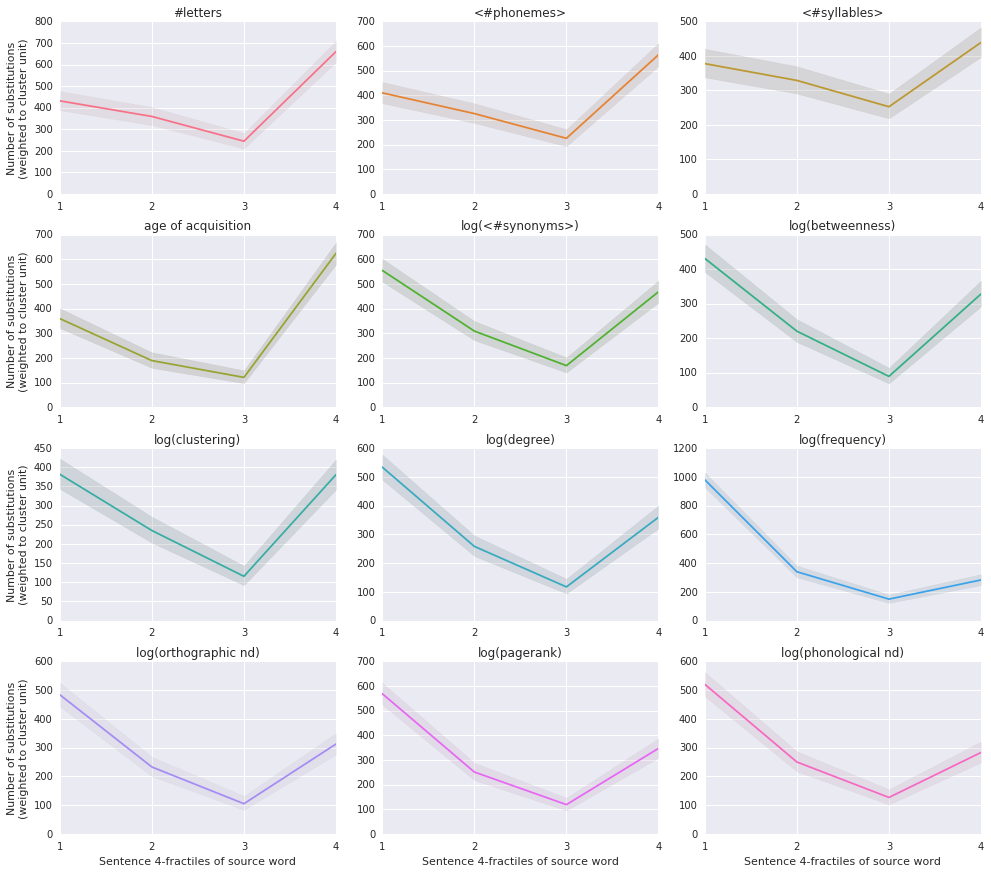

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

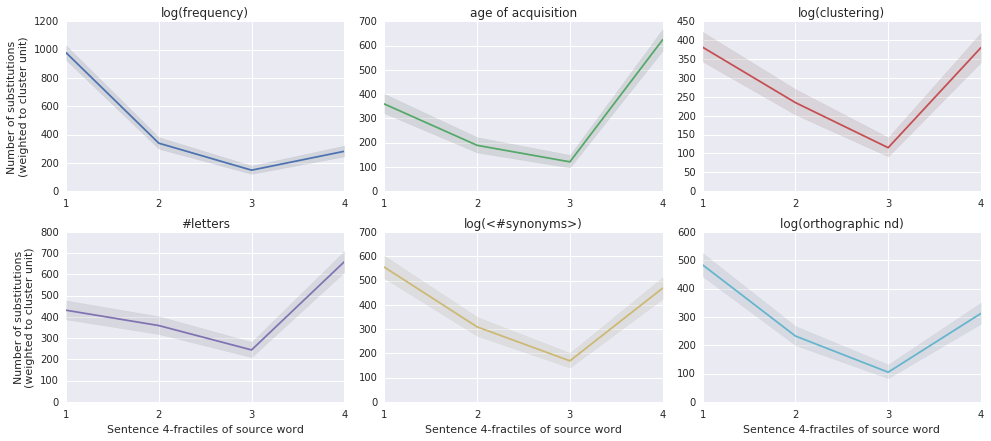

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)